n.dies.tot,P.bat,P.pv,P.cons,U.min,U.max,P.loss
3,2.2,7.5,11.4985,1.039616,1.049994,0.15459778
3,2.2,7.5,11.8450,1.039231,1.049999,0.16556537
3,2.2,7.5,12.1915,1.038835,1.049999,0.17711209
3,-2.2,6.0,5.2520,1.042300,1.049997,0.07015893
3,-2.2,6.0,5.5985,1.043181,1.049986,0.07375220
3,-2.2,6.0,5.9450,1.043682,1.049983,0.07957178
3,-2.2,6.0,6.2915,1.043815,1.049985,0.08756870
3,-2.2,6.0,6.6380,1.043850,1.049987,0.09669265
3,-1.1,6.0,6.3520,1.046405,1.049160,0.06551989
3,-1.1,6.0,6.6985,1.047068,1.049979,0.07050217


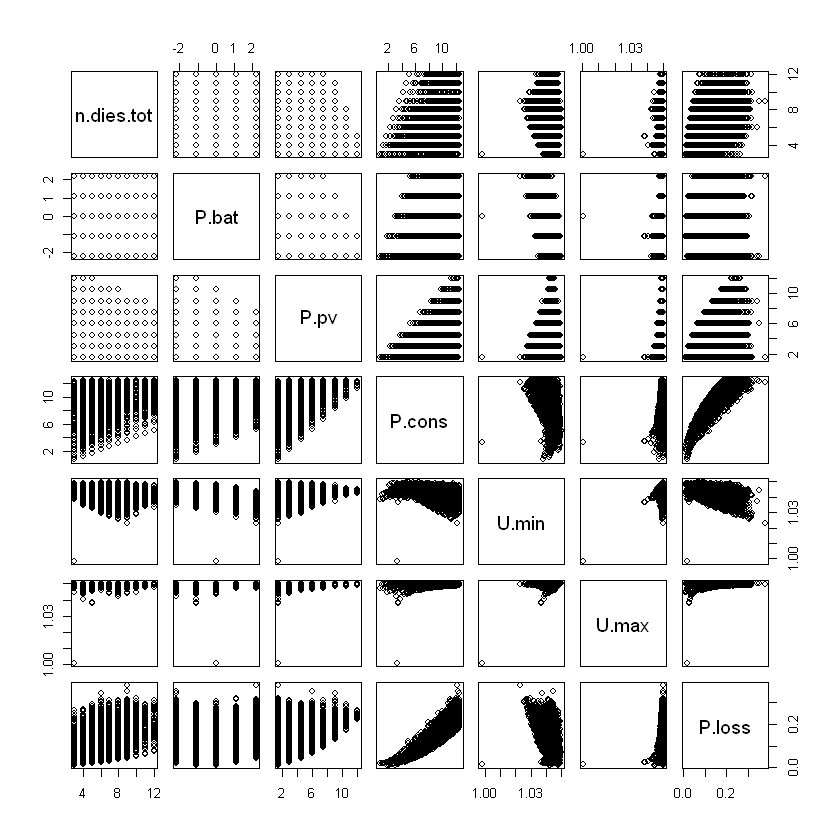

In [4]:
rm(list=ls())

require(R.matlab)

# Reading data 
data <- readMat(con = '../../Data/Generated Data/6 - Power Flows/opt_flow_sim.mat')
# data <- readMat(con = '../../Data/Generated Data/6 - Power Flows/opt_flow_sim_u_min.mat')
# t() - transpose matrix
X <- t(data.frame(data[[1]],stringsAsFactors = F)) 
X <- as.data.frame(X,row.names = T)
y <- (lapply(X,unlist))
z <- lapply(y,as.numeric)
j <- matrix(unlist(z), ncol = length(z), byrow = F)
cols <- c(1,2,3,4,5,6,7,8,9,10)
cols <- c(1,5,6,7,8,9,10)
k <- j[,cols]
colnames(k) <- names(X[,cols])
k[57:69,]

# comportament de la variable freq vs variables

# windows()
pairs(j[,cols], labels =  names(X[,cols]))
pairs(j[,cols], labels =  colnames(k))

In [5]:
# fit <- lm(P.loss ~ n.dies.1 + n.dies.2 + n.dies.3 + P.bat + P.pv + P.cons, data=data.frame(k))
# fit <- lm(U.min  ~ n.dies.1 + n.dies.2 + n.dies.3 + P.bat + P.pv + P.cons, data=data.frame(k))
# fit <- lm(U.max  ~ n.dies.1 + n.dies.2 + n.dies.3 + P.bat + P.pv + P.cons, data=data.frame(k))

# fit <- lm(P.loss ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))
# fit <- lm(U.min  ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))
# fit <- lm(U.max  ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))

# summary(fit) # show results

In [6]:
# Power Losses Model:

fit <- lm(P.loss ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))

summary(fit) # show results

# matrix(fit$coefficients)

psi_loss_i = matrix(fit$coefficients)[1];
psi_loss_d = matrix(fit$coefficients)[2];
psi_loss_b = matrix(fit$coefficients)[3];
psi_loss_p = matrix(fit$coefficients)[4];
psi_loss_c = matrix(fit$coefficients)[5];

writeMat(psi_loss_i = psi_loss_i, psi_loss_d = psi_loss_d, psi_loss_b = psi_loss_b, psi_loss_p = psi_loss_p, psi_loss_c=psi_loss_c, con="../../Data/Generated Data/6 - Power Flows/psi_loss.mat")


Call:
lm(formula = P.loss ~ n.dies.tot + P.bat + P.pv + P.cons, data = data.frame(k))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.032536 -0.012134 -0.003324  0.009066  0.144099 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.0907817  0.0010087  -90.00   <2e-16 ***
n.dies.tot  -0.0031764  0.0001539  -20.65   <2e-16 ***
P.bat       -0.0184835  0.0002161  -85.55   <2e-16 ***
P.pv        -0.0117637  0.0001828  -64.35   <2e-16 ***
P.cons       0.0336499  0.0001826  184.28   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0169 on 6830 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.9229 
F-statistic: 2.046e+04 on 4 and 6830 DF,  p-value: < 2.2e-16


In [7]:
# Minimum Voltage Model:

fit <- lm(U.min  ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))

summary(fit) # show results

# matrix(fit$coefficients)

psi_min_i = matrix(fit$coefficients)[1];
psi_min_d = matrix(fit$coefficients)[2];
psi_min_b = matrix(fit$coefficients)[3];
psi_min_p = matrix(fit$coefficients)[4];
psi_min_c = matrix(fit$coefficients)[5];

writeMat(psi_min_i = psi_min_i, psi_min_d = psi_min_d, psi_min_b = psi_min_b, psi_min_p = psi_min_p, psi_min_c=psi_min_c, con="../../Data/Generated Data/6 - Power Flows/psi_min.mat")


Call:
lm(formula = U.min ~ n.dies.tot + P.bat + P.pv + P.cons, data = data.frame(k))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.046410 -0.001175  0.000421  0.001524  0.007511 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  1.046e+00  1.409e-04 7421.286   <2e-16 ***
n.dies.tot   1.803e-04  2.150e-05    8.386   <2e-16 ***
P.bat       -1.024e-03  3.019e-05  -33.914   <2e-16 ***
P.pv         6.650e-04  2.554e-05   26.035   <2e-16 ***
P.cons      -9.303e-04  2.551e-05  -36.462   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.002361 on 6830 degrees of freedom
Multiple R-squared:  0.6074,	Adjusted R-squared:  0.6072 
F-statistic:  2642 on 4 and 6830 DF,  p-value: < 2.2e-16


In [8]:
# Maximum Voltage Model (disregarding diesel gens):

fit <- lm(U.max  ~ n.dies.tot + P.bat + P.pv + P.cons, data=data.frame(k))

summary(fit) # show results

# matrix(fit$coefficients)

psi_max_i = matrix(fit$coefficients)[1];
psi_max_d = matrix(fit$coefficients)[2];
psi_max_b = matrix(fit$coefficients)[3];
psi_max_p = matrix(fit$coefficients)[4];
psi_max_c = matrix(fit$coefficients)[5];

writeMat(psi_max_i = psi_max_i, psi_max_d = psi_max_d, psi_max_b = psi_max_b, psi_max_p = psi_max_p, psi_max_c=psi_max_c, con="../../Data/Generated Data/6 - Power Flows/psi_max.mat")


Call:
lm(formula = U.max ~ n.dies.tot + P.bat + P.pv + P.cons, data = data.frame(k))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.048732 -0.000322  0.000335  0.000456  0.000620 

Coefficients:
              Estimate Std. Error   t value Pr(>|t|)    
(Intercept)  1.049e+00  5.506e-05 19061.285  < 2e-16 ***
n.dies.tot  -2.439e-05  8.397e-06    -2.904 0.003693 ** 
P.bat       -2.694e-05  1.179e-05    -2.284 0.022390 *  
P.pv         2.658e-06  9.977e-06     0.266 0.789906    
P.cons       3.525e-05  9.966e-06     3.537 0.000408 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0009222 on 6830 degrees of freedom
Multiple R-squared:  0.009499,	Adjusted R-squared:  0.008919 
F-statistic: 16.38 on 4 and 6830 DF,  p-value: 2.335e-13


In [9]:
##### 70%
# 
# (Intercept)  1.1198374  0.0049378 226.788  < 2e-16 ***
# n.dies.tot   0.0081692  0.0008955   9.123  < 2e-16 ***
# P.bat        0.0104238  0.0014746   7.069 3.17e-12 ***
# P.pv         0.0229799  0.0012747  18.028  < 2e-16 ***
# P.cons      -0.0391187  0.0013653 -28.652  < 2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

# Residual standard error: 0.02923 on 881 degrees of freedom
# Multiple R-squared:  0.7318,	Adjusted R-squared:  0.7306 

##### 80%
#
# (Intercept)  1.1101206  0.0024274  457.33   <2e-16 ***
# n.dies.tot   0.0076488  0.0004445   17.21   <2e-16 ***
# P.bat        0.0091381  0.0007987   11.44   <2e-16 ***
# P.pv         0.0222390  0.0006180   35.99   <2e-16 ***
# P.cons      -0.0371704  0.0006653  -55.87   <2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#
# Residual standard error: 0.02752 on 3024 degrees of freedom
# Multiple R-squared:  0.7431,	Adjusted R-squared:  0.7427 

##### 90%
# 
# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept)  1.0864475  0.0017707  613.59   <2e-16 ***
# n.dies.tot   0.0042109  0.0003010   13.99   <2e-16 ***
# P.bat        0.0058317  0.0005719   10.20   <2e-16 ***
# P.pv         0.0158056  0.0004644   34.04   <2e-16 ***
# P.cons      -0.0274820  0.0005031  -54.62   <2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
# 
# Residual standard error: 0.01623 on 2221 degrees of freedom
# Multiple R-squared:  0.7884,	Adjusted R-squared:  0.788 

##### 91%
#
# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept)  1.0841752  0.0017863 606.944   <2e-16 ***
# n.dies.tot   0.0037037  0.0002976  12.443   <2e-16 ***
# P.bat        0.0052305  0.0005706   9.167   <2e-16 ***
# P.pv         0.0148329  0.0004701  31.553   <2e-16 ***
# P.cons      -0.0261143  0.0005051 -51.703   <2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#
# Residual standard error: 0.01529 on 2002 degrees of freedom
# Multiple R-squared:  0.7808,	Adjusted R-squared:  0.7804 

##### 92.5%
#
# (Intercept)  1.0788287  0.0017028 633.578  < 2e-16 ***
# n.dies.tot   0.0031841  0.0002805  11.350  < 2e-16 ***
# P.bat        0.0045225  0.0005466   8.273 2.52e-16 ***
# P.pv         0.0136344  0.0004596  29.668  < 2e-16 ***
# P.cons      -0.0240730  0.0004978 -48.361  < 2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#
# Residual standard error: 0.01346 on 1786 degrees of freedom
# Multiple R-squared:  0.7804,	Adjusted R-squared:  0.7799

##### 95%
#
# Coefficients:
#               Estimate Std. Error t value Pr(>|t|)    
# (Intercept)  1.0719970  0.0016795 638.269  < 2e-16 ***
# n.dies.tot   0.0025944  0.0002688   9.651  < 2e-16 ***
# P.bat        0.0041020  0.0005426   7.560 7.54e-14 ***
# P.pv         0.0121325  0.0004762  25.479  < 2e-16 ***
# P.cons      -0.0212271  0.0005197 -40.843  < 2e-16 ***
# ---
# Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
#
# Residual standard error: 0.01074 on 1310 degrees of freedom
# Multiple R-squared:  0.766,	Adjusted R-squared:  0.7653 